In [2]:
import pickle as pkl
import matplotlib.pyplot as plt
import os
import deepdish

In [3]:
main_dir="/mnt/lab_data2/anusri/chrombpnet/"
atac = main_dir+"results/chrombpnet/ATAC_PE/K562/nautilus_runs/K562_02.17.2022_bias_128_4_1234_0.5_fold_0/chrombpnet_model/motifs_footprints/motif_footprints.h5"
dnase = main_dir+"results/chrombpnet/DNASE_PE/K562/nautilus_runs_apr12/K562_04.09.2022_bias_128_4_1234_0.8_fold_0/chrombpnet_model/motifs_footprints/motif_footprints.h5"

In [4]:
atac_full = main_dir+"/results/chrombpnet/ATAC_PE/K562/nautilus_runs/K562_02.17.2022_bias_128_4_1234_0.5_fold_0/chrombpnet_model/motifs_footprints_uncorrected/motif_footprints.h5"
dnase_full = main_dir+"results/chrombpnet/DNASE_PE/K562/nautilus_runs_apr12/K562_04.09.2022_bias_128_4_1234_0.8_fold_0/chrombpnet_model/motifs_footprints_uncorrected/motif_footprints.h5"

In [20]:
data_atac = deepdish.io.load(atac)
data_dnase = deepdish.io.load(dnase)
data_atac_full = deepdish.io.load(atac_full)
data_dnase_full = deepdish.io.load(dnase_full)

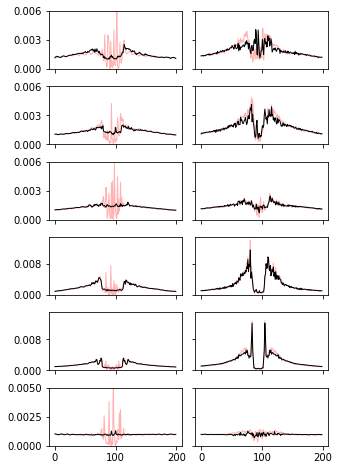

In [35]:
def plot_tracks(pred_unplug_bias, pred_bias, ax=None, ylim=0.01, start=500-100+5, end=500+100+5 ):
    width = end - start
    ax.plot(range(width), pred_bias[start:end], 'r', linewidth=1, alpha=0.3, label="uncorrected")
    ax.plot(range(width), pred_unplug_bias[start:end], 'k', linewidth=1, label="corrected")
    ax.set_ylim(0,ylim)  

motifs=["GATA+TAL", "GABPA", "NFYB", "BACH1+MAFK", "NRF1", "HNF4G"]
ylims=[0.006,0.006, 0.006, 0.015, 0.015, 0.005]

import numpy as np
plt.rcParams["figure.figsize"] = (5,8)
fig, axs = plt.subplots(len(motifs),2, sharex=True, sharey="row")

for i in range(len(motifs)):
    motif  = motifs[i]
    plot_tracks(np.array(data_atac[motif][0]), np.array(data_atac_full[motif][0]), axs[i,0], ylims[i])
    plot_tracks(np.array(data_dnase[motif][0]), np.array(data_dnase_full[motif][0]), axs[i,1], ylims[i])

    axs[i,0].yaxis.set_major_locator(plt.MaxNLocator(2))

fig.subplots_adjust(wspace=0.1, hspace=0.3)

plt.savefig("atac_versus_dnase_k562.png")
plt.show()
    
    